# Atividade 2 - Arthur Cerveira
## Exercício 1 - Interpolação Espacial

O exercício 1 consiste na implementação de uma função que redimensione uma imagem em tons de cinza por um algoritmo de *interpolação por vizinho mais próximo* ou *interpolação bilinear*, de acordo com o argumento `tipo`.

Abaixo está a imagem original e a implementação da função.

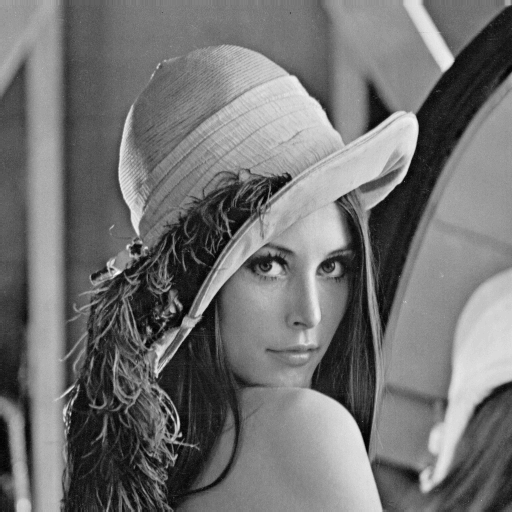

In [1]:
lenna = imread('./images/lena_cinza.bmp');
imshow(lenna);

In [2]:
function arquivo2 = redimensionar(arquivo1, tipo, num1, num2)
  image = imread(strcat('images/', arquivo1));
  [width, height] = size(image);
  
  result_width = ceil(num1 * width);
  result_height = ceil(num2 * height);

  result = zeros(result_width, result_height, "uint8");

  % Nearest-neighbor interpolation
  if (tipo == 1)
    for i = (1:width)
      for j = (1:height)
        start_i = ceil(num1*i);
        start_j = ceil(num2*j);
        
        end_i = floor(start_i + num1);
        end_j = floor(start_j + num2);

        result(start_i:end_i, start_j:end_j) = image(i, j);
      endfor
    endfor
  endif
  
  # Bilinear interpolation
  if (tipo == 2)
    for i = (1:width-1)
      for j = (1:height-1)
        start_i = ceil(num1*i);
        start_j = ceil(num2*j);
        
        Q11 = image(i, j);
        Q12 = image(i, j + 1);
        Q21 = image(i + 1, j);
        Q22 = image(i + 1, j + 1);
        
        end_i = floor(start_i + num1);
        end_j = floor(start_j + num2);
        
        for k = (start_i:end_i)
          for l = (start_j:end_j)
            % Weighted average
            R1 = (((end_i - k) / num1) * Q11) + (((k - start_i) / num1) * Q12);
            R2 = (((end_i - k) / num1) * Q21) + (((k - start_i) / num1) * Q22);
            
            P = (((end_j - l) / num2) * R1) + (((l - start_j) / num2) * R2);

            result(k, l) = round(P);
          endfor
        endfor
      endfor
    endfor
  endif

  # Set unique file name
  arquivo2 = strcat('images/resize_', num2str(tipo), '_', num2str(num1), '_', num2str(num2), '.png');
  
  imwrite(result, arquivo2);
endfunction

Então a função foi chamada para os exemplos apresentados nos slides. Aqui é possível observar como a *interpolação bilinear*, quando comparada a *interpolação por vizinho mais próximo*, diminue os serrilhados da imagem aumentada, embora também possa borrar o resultado final. Esses algoritmos também são capazes de reduzir as dimensões das imagens, ainda que isso resulte em uma alta perda de qualidade. A execução da *interpolação bilinear* se mostrou mais lenta em razão de sua maior complexidade e seus laços de repetição aninhados.

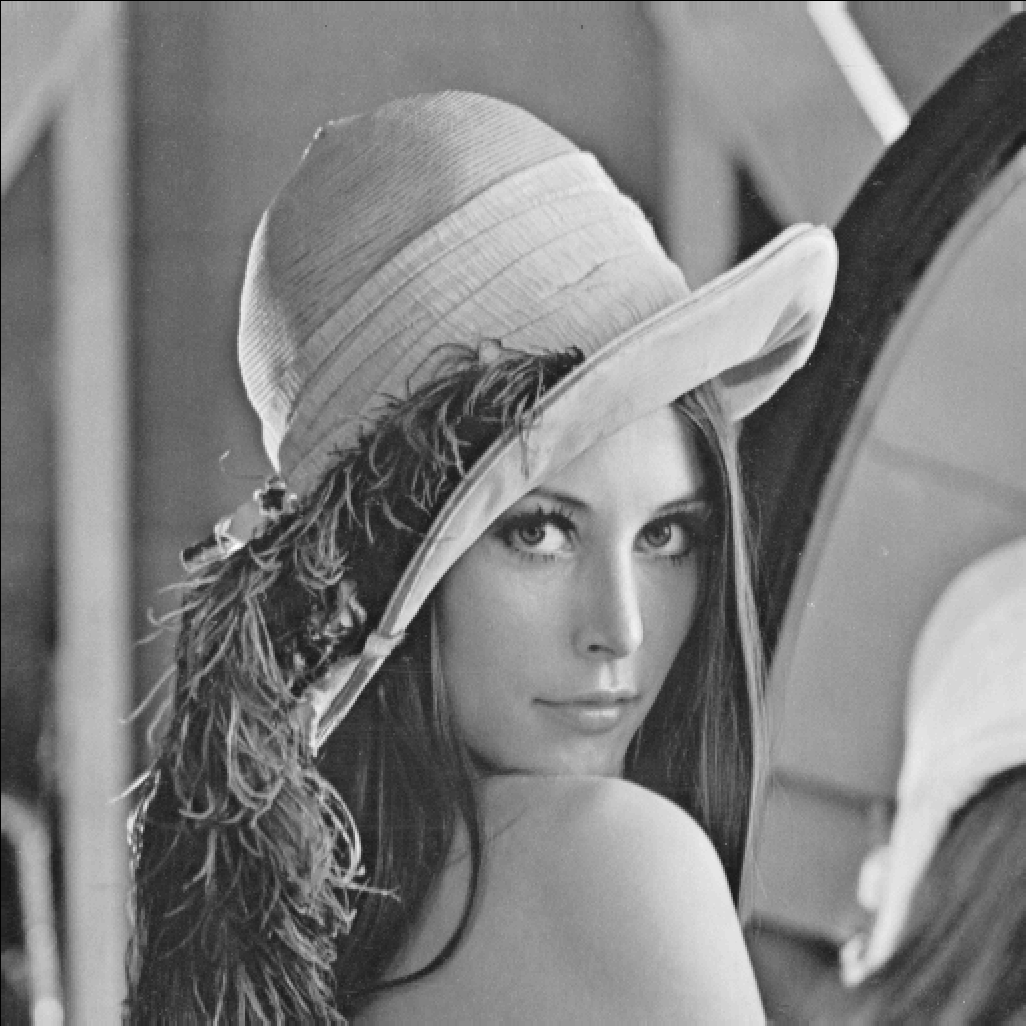

In [3]:
arquivo2 = redimensionar("lena_cinza.bmp", 1, 2, 2);

result = imread(arquivo2);
imshow(result);

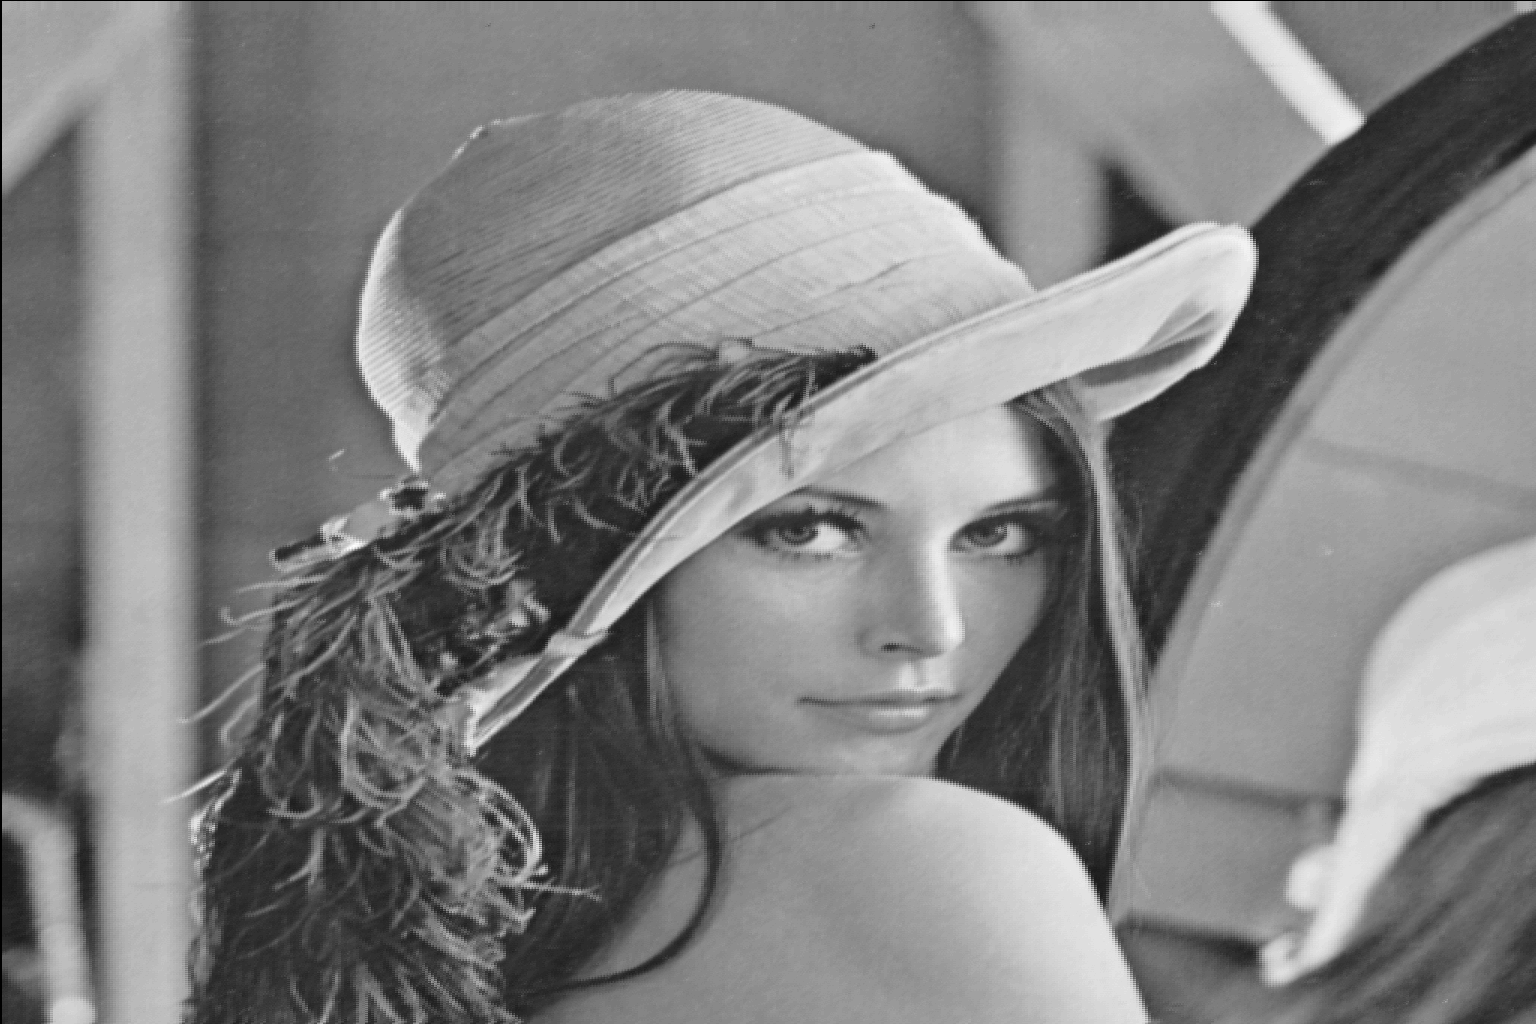

In [4]:
arquivo2 = redimensionar ("lena_cinza.bmp", 2, 2, 3);

result = imread(arquivo2);
imshow(result);

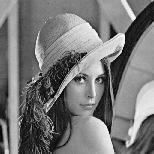

In [5]:
arquivo2 = redimensionar ("lena_cinza.bmp", 1, 0.3, 0.3);

result = imread(arquivo2);
imshow(result);